In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [2]:
df = pd.read_csv("data.csv")

In [3]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0}).astype(int)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Segregate the dataset into input and output.(Remove NAN values too)
X = df.dropna(axis=1).iloc[:,2:].values
Y = df.iloc[:,1].values

In [9]:
pd.DataFrame(X).isna().any(), pd.DataFrame(Y).isna().any()

(0     False
 1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7     False
 8     False
 9     False
 10    False
 11    False
 12    False
 13    False
 14    False
 15    False
 16    False
 17    False
 18    False
 19    False
 20    False
 21    False
 22    False
 23    False
 24    False
 25    False
 26    False
 27    False
 28    False
 29    False
 dtype: bool, 0    False
 dtype: bool)

In [10]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=34)

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
tr_x_train = ss.transform(x_train)
tr_x_test = ss.transform(x_test)

In [12]:
#Validating ML algorithm and calculating accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
from sklearn.model_selection import train_test_split, StratifiedGroupKFold, cross_val_score
models = []
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("NaiveBayes", GaussianNB()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", multi_class="ovr")))


KNN: 0.962637 (0.019160)
SVM: 0.973626 (0.014906)
NaiveBayes: 0.925275 (0.028146)
CART: 0.927473 (0.014906)
LDA: 0.949451 (0.020382)
Logistic Regression: 0.971429 (0.017855)


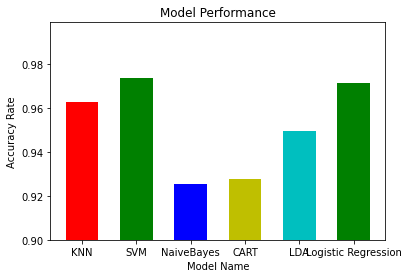

In [15]:
import matplotlib.pyplot as plt
names = []
results = []
res = []

for name, model in models:
  # skfold = StratifiedGroupKFold(n_splits=10)
  cv_result = cross_val_score(model, tr_x_train, y_train, cv=None)
  results.append(cv_result)
  names.append(name)
  res.append(cv_result.mean())
  print("%s: %f (%f)" % (name, cv_result.mean(), cv_result.std()))

plt.bar(names, res, color=list("rgbycg"), width=0.6)
plt.ylim(0.900, 0.999)
plt.title("Model Performance")
plt.xlabel("Model Name")
plt.ylabel("Accuracy Rate")
plt.show()